In [ ]:
import os
import json
import redis
import pandas as pd 
import matplotlib.pyplot as plt

# Loading Data from Redis

In [ ]:
# Load & Format the data from Redis
data_used = "test_1.pcap"
numb_of_packets = 7707

# Redis connection details
redis_host = "localhost"
redis_port = 6379
redis_db = 1
redis_key = "monitoring"

r = redis.StrictRedis(host=redis_host, port=redis_port, db=redis_db, decode_responses=True)

raw_data = r.lrange(redis_key, 0, -1)
print(f"Fetched {len(raw_data)} records from Redis.")

data_list = [json.loads(x) for x in raw_data]
df = pd.DataFrame(data_list)

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['elapsed_time'] = pd.to_numeric(df['elapsed_time'])
df['cpu_usage'] = pd.to_numeric(df['cpu_usage'])
df['ram_usage'] = pd.to_numeric(df['ram_usage'])
df['test_file'] = data_used
df['numb_of_packets'] = numb_of_packets

Fetched 22 records from Redis.


In [40]:
# Save data to CSV

csv_filename = "../src/monitoring.csv"
if os.path.exists(csv_filename):
    df_existing = pd.read_csv(csv_filename, parse_dates=['timestamp'])
    df_combined = pd.concat([df_existing, df], ignore_index=True)
    print(f"Existing data loaded. Appending {len(df)} new records.")
else:
    df_combined = df.copy()
    print(f"No existing data found. Creating new dataset with {len(df)} records.")


df_combined.to_csv(csv_filename, index=False)
print(f"Data saved to {csv_filename}")


Existing data loaded. Appending 22 new records.
Data saved to ../src/monitoring.csv


In [41]:
# Clean up Redis
r.delete(redis_key)
print(f"Redis key '{redis_key}' has been deleted.")

Redis key 'monitoring' has been deleted.


# Plotting

In [46]:
# Calculate average parameters

avg_cpu_mdl = df_mdl['cpu_usage'].mean()
avg_ram_mdl = df_mdl['ram_usage'].mean()
avg_elapsed_mdl = df_mdl['elapsed_time'].mean()

print(f"Average CPU usage for MDL: {avg_cpu_mdl}%")
print(f"Average RAM usage for MDL: {avg_ram_mdl} MB")
print(f"Average elapsed time for MDL: {avg_elapsed_mdl} s")
print()

avg_cpu_hrs = df_hrs['cpu_usage'].mean()
avg_ram_hrs = df_hrs['ram_usage'].mean()
avg_elapsed_hrs = df_hrs['elapsed_time'].mean()

print(f"Average CPU usage for HRS: {avg_cpu_hrs}%")
print(f"Average RAM usage for HRS: {avg_ram_hrs} MB")
print(f"Average elapsed time for HRS: {avg_elapsed_hrs} s")

Average CPU usage for MDL: 6.58875%
Average RAM usage for MDL: 671.263671875 MB
Average elapsed time for MDL: 0.4629798173904419 s

Average CPU usage for HRS: 4.2993749999999995%
Average RAM usage for HRS: 671.263671875 MB
Average elapsed time for HRS: 1.4808450222015381 s


In [47]:
# Calculate throughput

throughput = numb_of_packets / avg_elapsed_mdl
print(f"Throughput MDL: {throughput} pps")
print()

throughput = numb_of_packets / avg_elapsed_hrs
print(f"Throughput HRS: {throughput} pps")

Throughput MDL: 16646.51397428088 pps

Throughput HRS: 5204.460888514978 pps


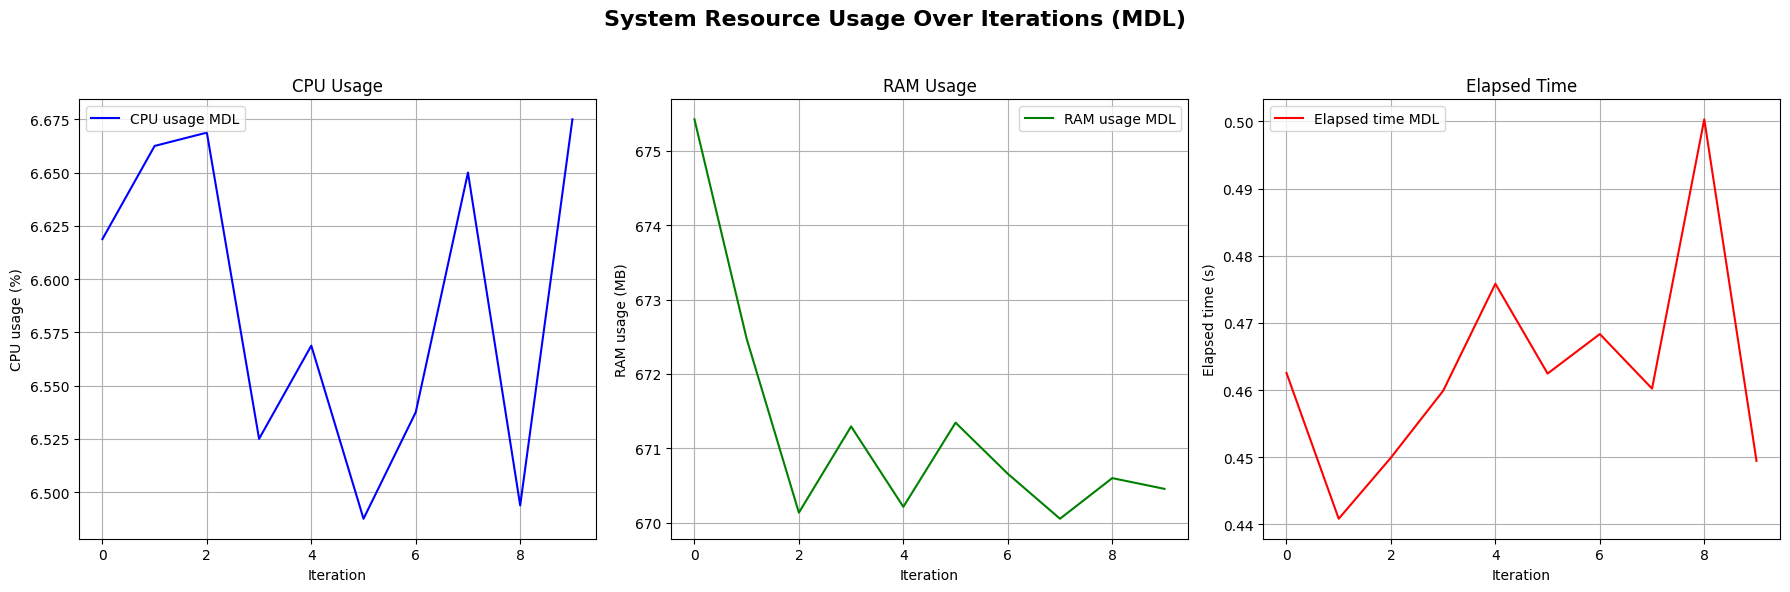

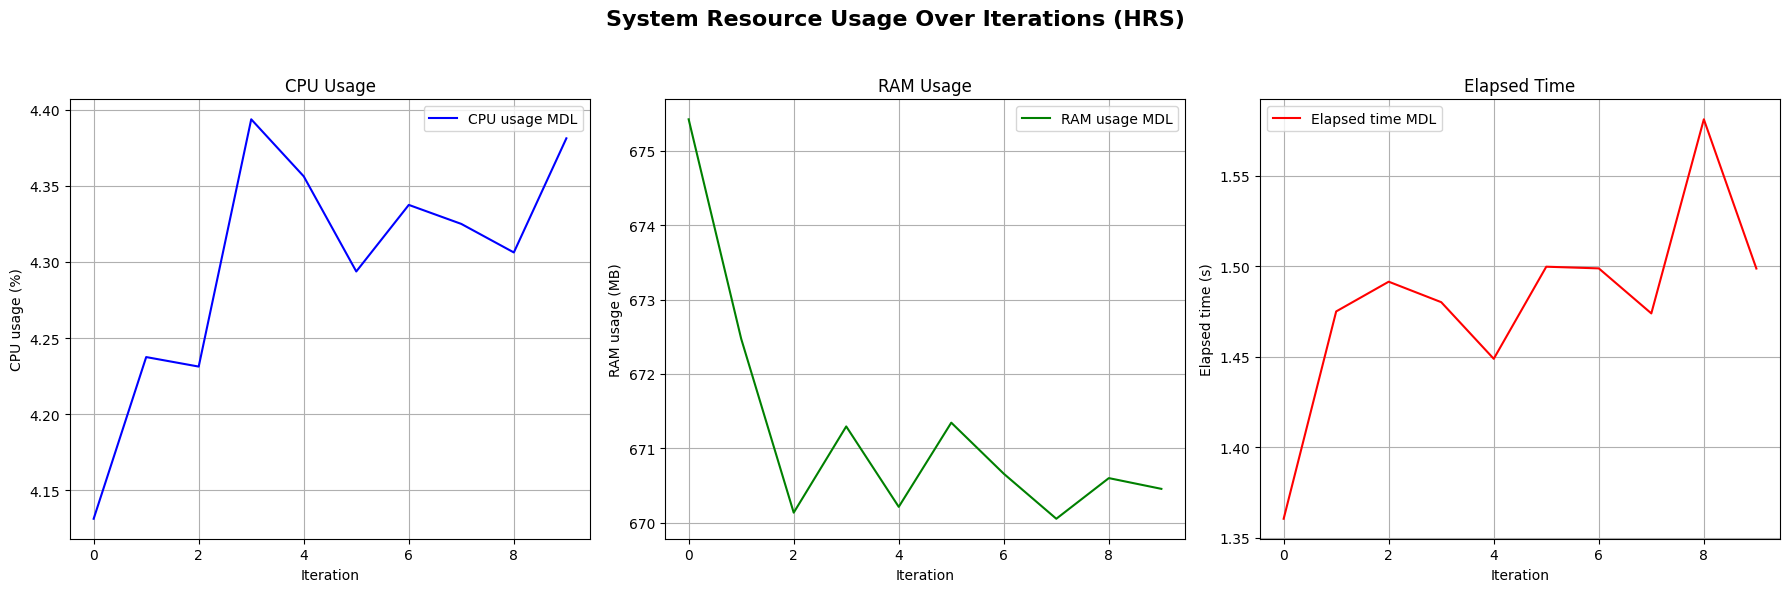

In [48]:
# Line Plot the data
fig = plt.figure(figsize=(18, 6))
fig.suptitle("System Resource Usage Over Iterations (MDL)", fontsize=16, fontweight='bold')

plt.subplot(1, 3, 1)
plt.plot(range(len(df_mdl)), df_mdl['cpu_usage'], label='CPU usage MDL', color='b')
plt.ylabel('CPU usage (%)')
plt.xlabel('Iteration')
plt.title('CPU Usage')
plt.legend()
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(range(len(df_mdl)), df_mdl['ram_usage'], label='RAM usage MDL', color='g')
plt.ylabel('RAM usage (MB)')
plt.xlabel('Iteration')
plt.title('RAM Usage')
plt.legend()
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(range(len(df_mdl)), df_mdl['elapsed_time'], label='Elapsed time MDL', color='r')
plt.ylabel('Elapsed time (s)')
plt.xlabel('Iteration')
plt.title('Elapsed Time')
plt.legend()
plt.grid()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

fig = plt.figure(figsize=(18, 6))
fig.suptitle("System Resource Usage Over Iterations (HRS)", fontsize=16, fontweight='bold')

plt.subplot(1, 3, 1)
plt.plot(range(len(df_hrs)), df_hrs['cpu_usage'], label='CPU usage MDL', color='b')
plt.ylabel('CPU usage (%)')
plt.xlabel('Iteration')
plt.title('CPU Usage')
plt.legend()
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(range(len(df_hrs)), df_hrs['ram_usage'], label='RAM usage MDL', color='g')
plt.ylabel('RAM usage (MB)')
plt.xlabel('Iteration')
plt.title('RAM Usage')
plt.legend()
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(range(len(df_hrs)), df_hrs['elapsed_time'], label='Elapsed time MDL', color='r')
plt.ylabel('Elapsed time (s)')
plt.xlabel('Iteration')
plt.title('Elapsed Time')
plt.legend()
plt.grid()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



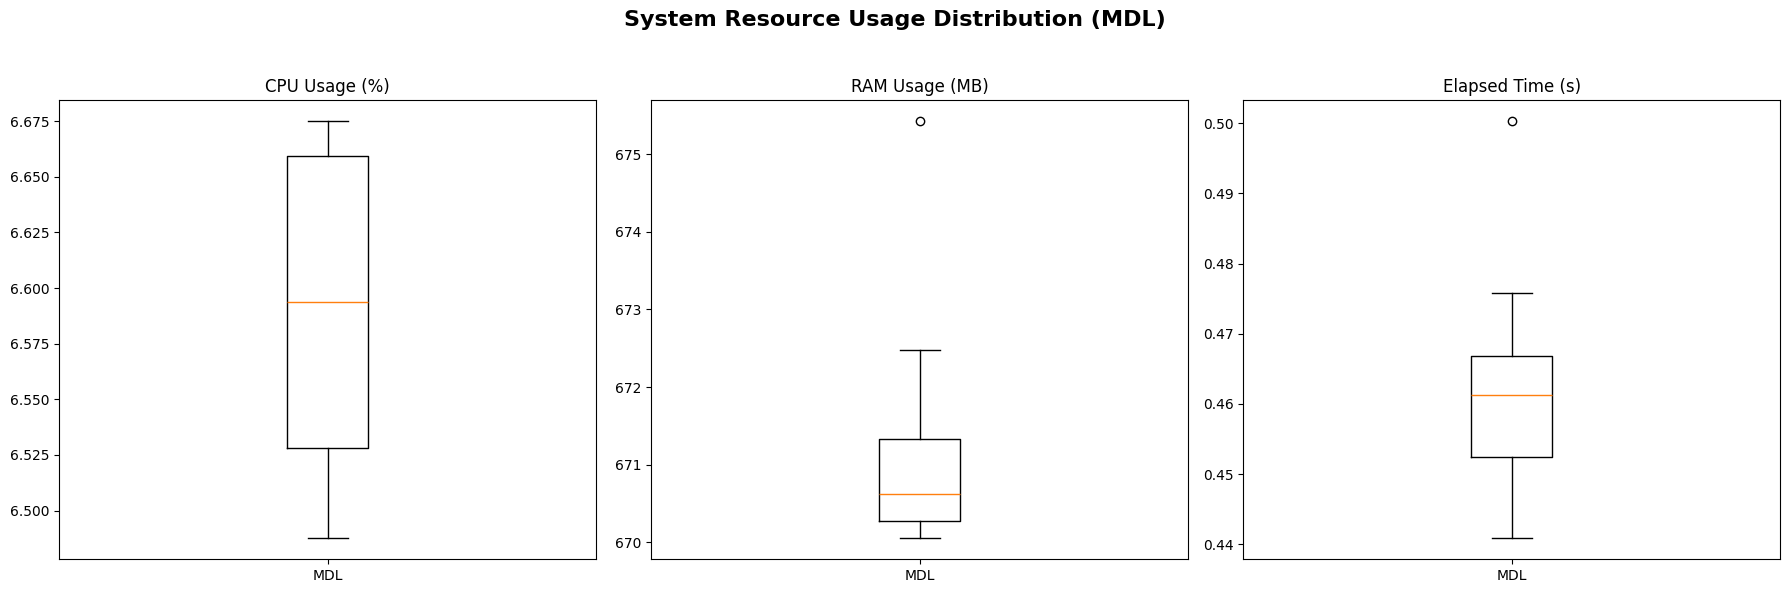

In [49]:
# Box Plot for System Resource Usage - MDL vs HRS
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("System Resource Usage Distribution (MDL)", fontsize=16, fontweight='bold')

# CPU Usage
axes[0].boxplot([df_mdl['cpu_usage']], tick_labels=['MDL'])
axes[0].set_title('CPU Usage (%)')

# RAM Usage
axes[1].boxplot([df_mdl['ram_usage']], tick_labels=['MDL'])
axes[1].set_title('RAM Usage (MB)')

# Elapsed Time
axes[2].boxplot([df_mdl['elapsed_time']], tick_labels=['MDL'])
axes[2].set_title('Elapsed Time (s)')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
